In [1]:
import pandas as pandas
from datetime import datetime
import sys
sys.path.append('../src')

from data_loader import load_project_data, validate_data
from evm_calculations import calculate_evm_metrics

df = load_project_data('../data/progress.csv')
print('Succesfully loaded the data')
print(df.head())

try:
    validate_data(df)
    print("The data passed the validation")
except AssertionError as e:
    print(f"Validation error{e}")


Succesfully loaded the data
  task_id                     task_name start_date   end_date  planned_cost  \
0    T001                 Разработка ТЗ 2023-01-10 2023-01-20          1000   
1    T002    Проектирование архитектуры 2023-01-21 2023-02-10          2000   
2    T003           Разработка модуля X 2023-02-11 2023-03-15          5000   
3    T004   Интеграционное тестирование 2023-03-16 2023-04-05          3000   
4    T005  Внедрение и документирование 2023-04-06 2023-04-30          4000   

   actual_cost  completion_pct       status  
0         1200             100         Done  
1         1500              80  In Progress  
2         3000              50  In Progress  
3            0               0  Not Started  
4            0               0  Not Started  
The data passed the validation


In [2]:
report_date = datetime(2023, 2, 15)
print(f"\nРасчёт метрик на дату: {report_date.strftime('%Y-%m-%d')}")
metrics = calculate_evm_metrics(df, report_date)

print("\nМЕТРИКИ EVM:")
print(f"Planned Value (PV): ${metrics['PV']:,.2f}")
print(f"Earned Value (EV): ${metrics['EV']:,.2f}")
print(f"Actual Cost (AC): ${metrics['AC']:,.2f}")
print(f"Cost Variance (CV): ${metrics['CV']:,.2f} ({'Перерасход' if metrics['CV'] < 0 else 'Экономия'})")
print(f"Schedule Variance (SV): ${metrics['SV']:,.2f} ({'Отставание' if metrics['SV'] < 0 else 'Опережение'})")
print(f"Cost Performance Index (CPI): {metrics['CPI']:.2f} ({'Перерасход' if metrics['CPI'] < 1 else 'В рамках бюджета'})")
print(f"Schedule Performance Index (SPI): {metrics['SPI']:.2f} ({'Отставание' if metrics['SPI'] < 1 else 'По графику'})")
print(f"Budget at Completion (BAC): ${metrics['BAC']:,.2f}")
print(f"Estimate at Completion (EAC): ${metrics['EAC']:,.2f}")
print(f"Estimate to Complete (ETC): ${metrics['ETC']:,.2f}")
print(f"Variance at Completion (VAC): ${metrics['VAC']:,.2f} ({'Перерасход' if metrics['VAC'] < 0 else 'Экономия'})")



Расчёт метрик на дату: 2023-02-15

МЕТРИКИ EVM:
Planned Value (PV): $7,625.00
Earned Value (EV): $12,000.00
Actual Cost (AC): $13,300.00
Cost Variance (CV): $-1,300.00 (Перерасход)
Schedule Variance (SV): $4,375.00 (Опережение)
Cost Performance Index (CPI): 0.90 (Перерасход)
Schedule Performance Index (SPI): 1.57 (По графику)
Budget at Completion (BAC): $173,800.00
Estimate at Completion (EAC): $192,628.33
Estimate to Complete (ETC): $179,328.33
Variance at Completion (VAC): $-18,828.33 (Перерасход)


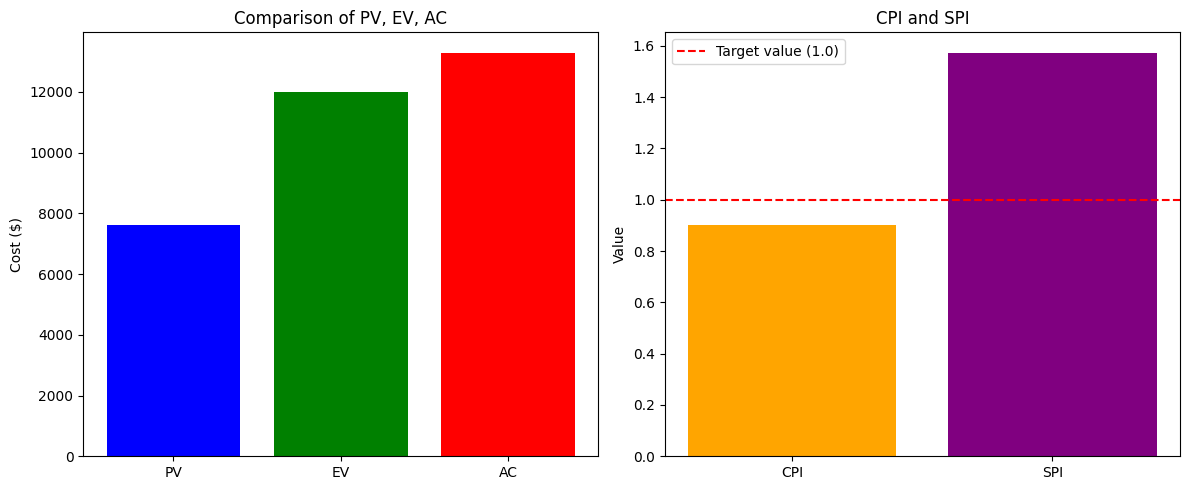

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(['PV', 'EV', 'AC'], [metrics['PV'], metrics['EV'], metrics['AC']], 
          color=['blue', 'green', 'red'])
ax[0].set_title('Comparison of PV, EV, AC')
ax[0].set_ylabel('Cost ($)')

ax[1].bar(['CPI', 'SPI'], [metrics['CPI'], metrics['SPI']], color=['orange', 'purple'])
ax[1].axhline(y=1, color='red', linestyle='--', label='Target value (1.0)')
ax[1].set_title('CPI and SPI')
ax[1].set_ylabel('Value')
ax[1].legend()

plt.tight_layout()
plt.savefig('../figs/baseline_metrics.png', dpi=150, bbox_inches='tight')
plt.show()

In [9]:
import sys 
import os
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

from report_generator import create_evm_report, get_performance_status

#create report
report_path = create_evm_report(metrics, df, report_date, '../reports/evm_dashboard_report.html')
print(f"✅ HTML отчёт сохранён: {report_path}")

#show performance status
performance_status = get_performance_status(metrics)
print("\n📊 СТАТУС ПРОЕКТА:")
for status in performance_status:
    print(f"• {status}")

✅ HTML отчёт сохранён: ../reports/evm_dashboard_report.html

📊 СТАТУС ПРОЕКТА:
• ❌ **Перерасход бюджета** (CPI < 1)
• ✅ **График выполняется**
• ⚠️ **Прогнозируемый перерасход:** $18,828.33
